In [106]:
%%javascript

window.load_remote_theme = false
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme)
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# Polynomial Regression

> Do we need to have 280 brands of breakfast cereal? No, probably not. But we have them for a reason - because some people like them. It's the same with baseball statistics.

<footer>~ Bill James</footer>

![break](assets/agenda.png)

1. Assumptions Of Linear Regressions
1. Polynomial Regression
1. Signs Of Multicolinearity
1. Regularization

**Labs:**
1. Ordinary Least Squares & Ridge Regression

![break](assets/theory.png)

## Assumptions of Linear Regressions

### Variables are normally distributed

Regression assumes that variables have normal distributions.  Non-normally distributed variables (highly skewed or kurtotic variables, or variables with substantial outliers) can distort relationships and significance tests.

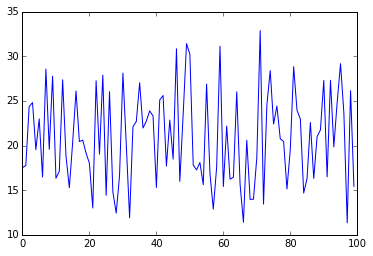

In [4]:
%matplotlib inline
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)
pylab.plot(measurements)
pylab.show()

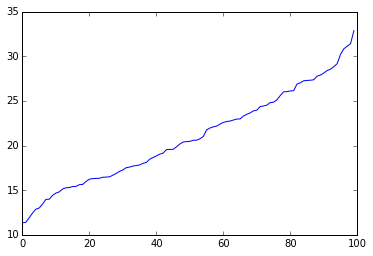

In [5]:
pylab.plot(sorted(measurements))
pylab.show()

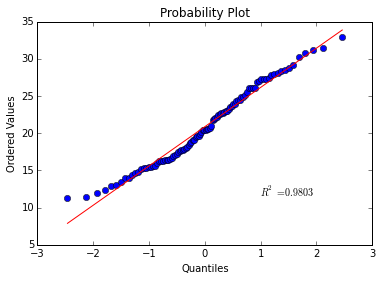

In [6]:
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

### Assumption of a linear relationship between the independent and dependent variable(s).

Standard multiple regression can only accurately estimate the relationship between dependent and independent variables if the relationships are linear in nature. mm

![](assets/v7n24.0.gif)

![](assets/v7n24.1.gif)

### Variables are measured without error (reliably)

In simple correlation and regression, unreliable measurement causes relationships to be under-estimated increasing the risk of Type II errors (false negative).  In the case of multiple regression or partial correlation, effect sizes of other variables can be over-estimated if the covariate is not reliably measured, as the full effect of the covariate(s) would not be removed.  This is a significant concern if the goal of research is to accurately model the “real” relationships evident in the population. 

### Assumption of homoscedasticity

Homoscedasticity means that the variance of errors is the same across all levels of the IV.  When the variance of errors differs at different values of the response variable, heteroscedasticity is indicated

When heteroscedasticity is marked it can lead to serious distortion of findings and seriously weaken the analysis thus increasing the possibility of a Type I error.

![](assets/v7n24.11.gif)
![](assets/v7n24.12.gif)
![](assets/v7n24.13.gif)

### Independence of the Error Terms

Independence assumptions are usually formulated in terms of error terms rather than in terms of the outcome variables

$$Y = α + βx + ε$$ 

where Y is the outcome (response) variable and ε denotes the error term (also a random variable). It is the error terms that are assumed to be independent, not the values of the response variable. 

We do not know the values of the error terms $ε$, so we can only plot the residuals $e_i$ (defined as the observed value $y_i$ minus the fitted value, according to the model), which approximate the error terms. 

how to [break them](http://www.basic.northwestern.edu/statguidefiles/linreg_ass_viol.html), some [Transformations](http://www.basic.northwestern.edu/statguidefiles/linreg_alts.html#Transformations) to meet them, and [Common Mistakes on Intepreting Regressions](https://www.ma.utexas.edu/users/mks/statmistakes/regressioncoeffs.html)

![break](assets/theory.png)

## Polynomial Regression

Consider the following polynomial regression model

$$y = α + β_1x + β_2x^2 + ε$$

** Q: This represents a nonlinear relationship. Is it still a linear model?**

A: Yes, because it’s linear in the β's!

> “Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y|x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.”

<footer>~ Wikipedia</footer>


Polynomial regression allows us to fit very complex
curves to data.

$$y = α + β_1x + β_2x^2 + ... + β_nx^n + ε$$

A very simple [visual reminder](http://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn) of what it means to add polynomials to your design matrix. Code with plot explaining why you'd want to [use polynomials](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html) in the first place. Numpy also provides a [module](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to directly deal with polynomials.

Automatically created module for IPython interactive environment


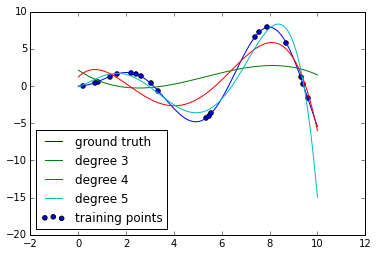

In [7]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

plt.plot(x_plot, f(x_plot), label="ground truth")
plt.scatter(x, y, label="training points")

for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

But there is one problem with the model we’ve written
down so far. This model violates one of the assumptions of linear regression!

This model displays multicollinearity, which means the
predictor variables are highly correlated with each other.

In [8]:
import numpy as np

x = np.arange(1, 10, 0.1)
np.corrcoef(x**9,x**10)[0][1]

0.9987609495377574

#### MultiColinearity

Multicollinearity causes the linear regression model to break down, because it can’t tell the predictor variables apart. This results in a singularity.

How can we deal with multicolinearity? Replace the correlated predictors with uncorrelated predictors.

A simple [Standardization Technique](https://www.stat.fi/isi99/proceedings/arkisto/varasto/kim_0574.pdf) to deal with the MultiColinearity of Polynomials. This was implemented and covered in more detail in the [excercise/health example](https://onlinecourses.science.psu.edu/stat501/node/85). Another way is to use [Orthoganal Polynomials](http://dlmf.nist.gov/18.4) to deal with multicolinearity. Finally, an academic paper discussing how to [Minimize the Effects of Colinearity](ftp://ftp.bgu.ac.il/shacham/publ_papers/IandEC_36_4405_97.pdf).

$$y = α + β_1f_1(x) + β_2f_2(x^2) + ... + β_nf_n(x^n) + ε$$

![break](assets/theory.png)

## Signs of Multicolinearity

* A regression coefficient is not significant even though, theoretically, that variable should be highly correlated with Y.
* When you add or delete an X variable, the regression coefficients change dramatically.
* You see a negative regression coefficient when your response should increase along with X.
* You see a positive regression coefficient when the response should decrease as X increases.
* Your X variables have high pairwise correlations.


Formally, we can check the tolerance values or `variance inflation ratio` (VIF) to investigate possible collinearity. We define the `tolerance` as 1 - R2 and `VIF` as 1/Tolerance.

The less the tolerance’s value, (or it is closer to zero, or < 0.1), the worse of the collinearity. This is conforms to the formula: as tolerance close to zero then R2 is closer to 1, meaning a stronger linear relation.

It is not surprising, since VIF is the reciprocal of the tolerance, then the larger of the value of VIF, the worse the collinearity!

Usually, if VIF is greater than 10 we should consider it a warning sign! Under the situation when there is collinearity, we may reasonably consider using only one of the correlated variables (ignore the other one, it does not matter which one to choose staying in the model). 

![break](assets/theory.png)

## Regularization

**Q: What’s overfitting?**

Overfitting occurs when a model matches the noise
instead of the signal.

* **Noise**: Extra “cruft” that doesn’t contribute to a readable
prediction.
* **Signal**: Clean, elegant interpretation of the data

This happens when our model is too complex!

#### Overfitting (Classification)
![](assets/overfitting_classification.png) 

#### Overfitting (Regression)
![](assets/overfitting_regression.jpg)


**Q: How do we define the complexity of a regression
model?**

A: One method is to define **complexity** as a function of the size of the coefficients.

$Ex1: \lVert \beta_i \rVert_1 =  \Sigma | \beta_i |$ , this is called the **L1-norm**

$Ex2:  \lVert \beta_i \rVert_2 = \Sigma \beta_i^2 $$ $ , this is called the **L2-norm**


These measures of complexity lead to the following
regularization techniques:

#### L1 regularization:
$$y=Σβ_ix_i + ε \quad st. \quad Σ | β_i | \lt s$$
    
#### L2 regularization:
$$y=Σβ_ix_i + ε \quad st. \quad Σ β_i^2 \lt s$$

Regularization refers to the method of preventing
overfitting by explicitly controlling model complexity.

These regularization problems can also be expressed as:

#### L1 regularization:
$$ min(\lVert y - βx \rVert^2 + λ\lVert β \rVert)$$
    
#### L2 regularization:
$$ min(\lVert y - βx \rVert^2 + λ\lVert β \rVert^2)$$

but more importantly, we can think about the use cases of these two more clearly this way:

**L1 regularization**:  Used when we have small data but many features.

**L2 regularization**: Used in just about all other cases.

This (Lagrangian) formulation reflects the fact that
there is a cost associated with regularization.

Clear introduction to the [L-1 and L-2 Norms](http://rorasa.wordpress.com/2012/05/13/l0-norm-l1-norm-l2-norm-l-infinity-norm/).

### Bias and Variance

* **Bias** refers to predictions that are systematically
inaccurate. 
* **Variance** refers to predictions that are generally
inaccurate.

![](assets/bias_variance_darts.png)

It turns out (after some math) that the generalization error in our model can be decomposed into a bias component and variance component.

#### This is another example of the bias-variance tradeoff.

![](assets/bias_variance_tradeoff.jpg)

This tradeoff is regulated by a hyperparameter $λ$, which we’ve already seen:

#### L1 regularization

$$y=Σβ_ix_i + ε \quad st. \quad Σ \lVert β_i \rVert \lt λ$$


#### L2 regularization

$$y=Σβ_ix_i + ε \quad st. \quad Σ \lVert β_i^2 \rVert \lt λ$$

We should take advantage of generalization to trade off variance in our data for bias in our fit, which will overall produce a clearer and better overall fit to our data!

![break](assets/code.png)

## Ordinary Least Squares & Ridge Regression

* Practice using both the `LinearRegression` and `RidgeRegression` models in scikit-learn
* Explore differences between a model using OLS (L1) and LLS (L2) regularization
* Tear apart and understand how predictions get built in scikit learn


In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Store data in a consistent place
DATA_DIR = '../data/'

### More in depth understanding behind how scikit learn works

Load up this script (using the same mammals set we glanced at before) and let's break down (and also break) what's going on with each line of code.

In [10]:
from sklearn import linear_model

mammals = pd.read_csv(DATA_DIR + 'mammals.csv')

lm = linear_model.LinearRegression()
log_lm = linear_model.LinearRegression()

In [11]:
body = [ [x] for x in mammals['body'].values]
brain = mammals['brain'].values

In [12]:
log_body = [ [x] for x in np.log(mammals['body'].values)]
log_brain = np.log(mammals['brain'].values)

In [13]:
lm.fit(body, brain)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [14]:
log_lm.fit(log_body, log_brain)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

We can observe various features about our linear models that we've discussed in lecture.

#### Find the intercept

Note we can set to train for an intercept with `set_params()`

In [15]:
lm.intercept_

91.00439620740687

In [16]:
log_lm.intercept_

2.1347886767646358

#### Print out the predictions for a given matrix

needs to fit the same dimensional space as the data we fit

In [17]:
lm.predict(body)
mammals['predict'] = lm.predict(body)
mammals['predict']

0     94.275986
1     91.468314
2     92.309166
3    540.425207
4    126.117209
5    117.737686
6    105.337537
7     92.009552
...
54     91.050788
55    276.571699
56     93.903885
57    245.643815
58     91.874243
59     92.570120
60     91.104912
61     95.097508
Name: predict, Length: 62, dtype: float64

In [18]:
log_lm.predict(log_body)
mammals['log_predict'] = np.exp(log_lm.predict(log_body))
mammals['log_predict']

0     21.144078
1      4.869905
2     10.594903
3    855.487784
4    125.879932
5    102.552664
6     64.188507
7      8.708245
...
54      0.862650
55    439.999684
56     19.309556
57    383.647997
58      7.811450
59     12.151123
60      1.542569
61     25.022105
Name: log_predict, Length: 62, dtype: float64

### Scipy.stats

Sometimes you also want to find some elementary statistics

response mean 22.0555555556
standard Deviation of Y 1.93569459891
r-squared value 0.913838550247
p_value 5.65761249232e-05
standard deviation of error terms 0.0831744517144


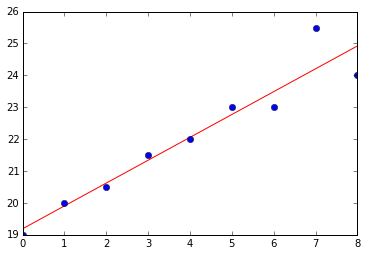

In [19]:
from numpy import arange,array,ones#,random,linalg
from pylab import plot,show
from scipy import stats

xi = arange(0,9)
A = array([ xi, ones(9)])
# linearly generated sequence
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

# H0
print 'response mean', np.mean(y)

# Standard Deviation of Y
print 'standard Deviation of Y', np.std(y)

# Coefficient of Determination
print 'r-squared value', r_value**2

# Is the statistic significant?
print 'p_value', p_value

print 'standard deviation of error terms', std_err

line = slope*xi+intercept
plot(xi,line,'r-',xi,y,'o')
show()


### Practice: Plotting Predictions

Since pyplot plots _discretely_ (and not continuously), if we want an accurate representation of any transformed plot (particularly for polynomial data), we need to sort our data frame by the response value. We can either do this before fitting a model (with the actual response) or post-fit (with the predicted response).

In [20]:
# Sort by response:
mammals = mammals.sort('brain')

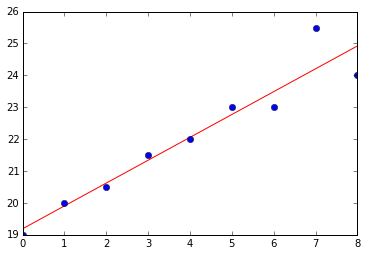

In [21]:
# Sort by prediction:
mammals_log_sort = mammals.sort('log_predict')

plot(xi,line,'r-',xi,y,'o')
show()

Otherwise, use plt.scatter and plt.plot as we know how to use them.

### Polynominal regressions

Likewise, polynomial regressions can work as new inputs constructed from our data:

In [99]:
# zip acts like a zipper! It takes two lists and it pairs them item-wise
body_squared = zip(mammals['body'].values, mammals['body'] ** 2)

In [100]:
# Or just make a new column first
mammals['body_squared'] = mammals['body'] ** 2
# mammals['body_cubed'] = mammals['body'] ** 3
body_squared = mammals[['body', 'body_squared']].values
# body_squared = mammals[['body', 'body_squared','body_cubed']].values

In [77]:
body_squared[:5]

array([[  5.00000000e-03,   2.50000000e-05,   1.25000000e-07],
       [  1.00000000e-02,   1.00000000e-04,   1.00000000e-06],
       [  2.30000000e-02,   5.29000000e-04,   1.21670000e-05],
       [  4.80000000e-02,   2.30400000e-03,   1.10592000e-04],
       [  2.30000000e-02,   5.29000000e-04,   1.21670000e-05]])

The LinearRegression model in scikit learn uses L1-Normalization. Let's check out a Ridge Regression, which uses L2.

In [98]:
results = []
for alpha in [1,2,5,10,20,50,100,200,500,1000]:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(body_squared, brain)
    score = ridge.score(body_squared, brain)
    results.append((alpha, score))

print results

[(1, 0.014090605906597498), (2, 0.014090605906466713), (5, 0.014090605905553555), (10, 0.014090605902291276), (20, 0.014090605889242047), (50, 0.014090605797910105), (100, 0.014090605471804629), (200, 0.014090604167990683), (500, 0.014090595053097399), (1000, 0.014090562579061827)]


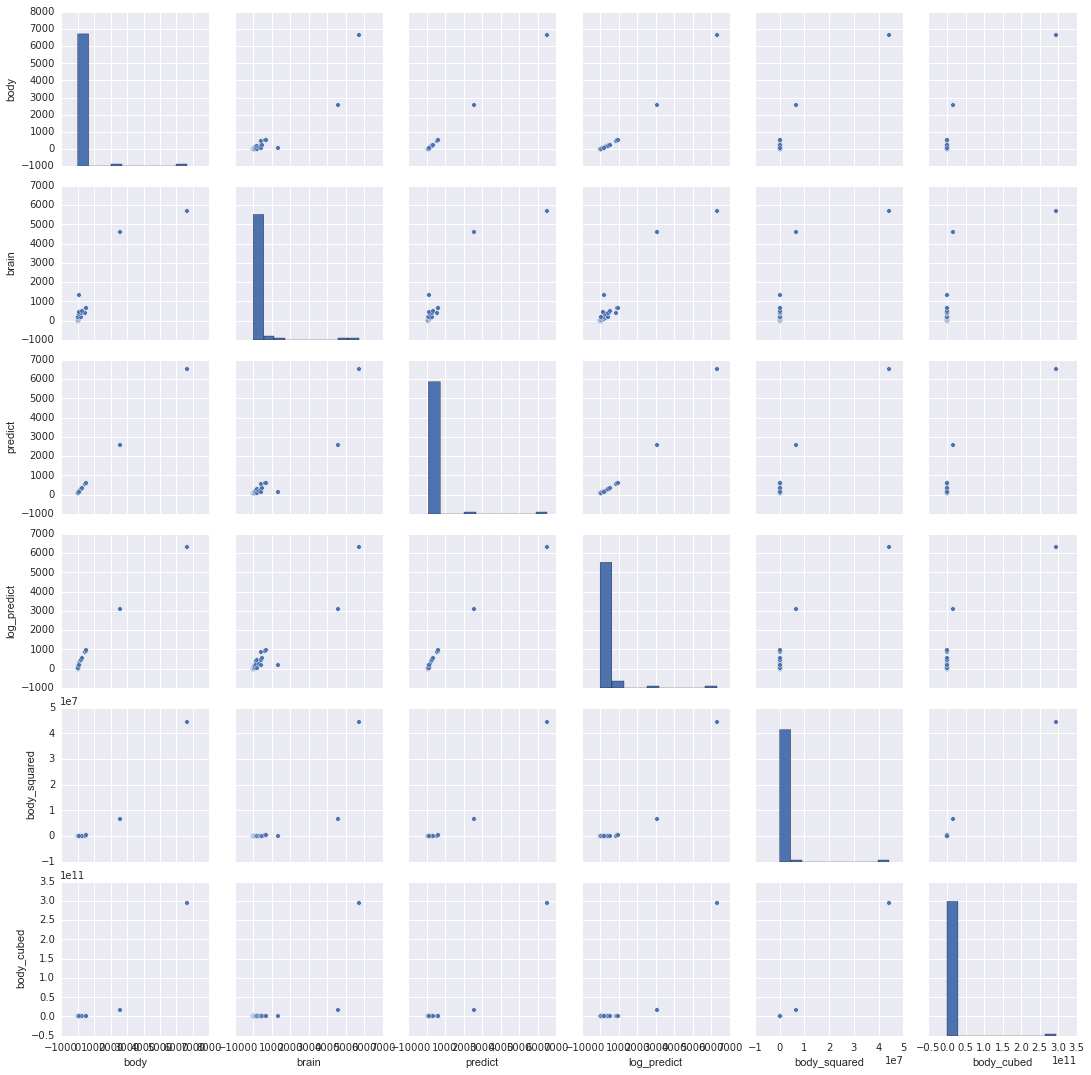

In [101]:
import seaborn as sns
sns.pairplot(mammals, size=2.5);

Check the coefficients and the intercept. and we can verify the results of ridge.predict() against handwriting the full regression:

In [50]:
((ridge.coef_[1] * mammals['body'])**2) + ((ridge.coef_[0] * mammals['body'])) + ridge.intercept_

13    312.246993
39    312.245300
19    312.240895
54    312.232426
38    312.240895
14    312.228361
37    312.208034
52    312.223279
...
3      154.719045
45     294.578220
41     227.555218
21     135.747794
27     133.037617
31     291.244683
18    -550.596109
32   -1941.863346
Name: body, Length: 62, dtype: float64

## Classwork

Work through the following datasets, determining best fits for each data set (predictor value/y value in parens). To better evaluate or improve this process, try including:

In [103]:
from sklearn import feature_selection as fs

def f_regression_feature_selection(input, response):    
# use this against your feature matrix to determine p-values for
# each feature (we care about the second array it returns).
    return fs.univariate_selection.f_regression(input, response)    

### Datasets

* [Predicting stopping distance](https://gist.github.com/tijptjik/03305bc2d75cda183439 )
* [Predicting City and Highway MPG.](https://gist.github.com/tijptjik/3746ac7c1f0ec6953ed7 )

In [1]:
!curl https://gist.githubusercontent.com/tijptjik/03305bc2d75cda183439/raw/5d0acdb9dc7a5b39d057c837ec650dd09c4e9b36/cars1920.csv >  ../data/cars1920.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   308    0   308    0     0    260      0 --:--:--  0:00:01 --:--:--   260


In [2]:
!curl https://gist.githubusercontent.com/tijptjik/3746ac7c1f0ec6953ed7/raw/6561674a1c1edff3b7f78fcce326df5c72bf402e/cars93.csv >  ../data/cars93.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14410    0 14410    0     0   9703      0 --:--:--  0:00:01 --:--:--  9703


### Tips

If your data isn't a good fit, what are some things you might try?

1. Increase the number of training points N. This might give us a training set with more coverage, and lead to greater accuracy.
1. Increase the degree d of the polynomial. This might allow us to more closely fit the training data, and lead to a better result
1. Add more features. If we were to, for example, perform a linear regression using x, x√, x−1, or other functions, we might hit on a functional form which can better be mapped to the value of y.


![break](assets/resources.png)

## Resources

#### Handbooks

* [Regression Analysis by Example](http://type.hk:2551/calibre/browse/book/294) (**Chapter 3 - 4**) - Samprit Chatterjee

#### Articles

* [Introduction to Regression](http://dss.princeton.edu/online_help/analysis/regression_intro.htm)
* [Good Regression Overview](http://www.stat.purdue.edu/~jennings/stat514/stat512notes/topic3.pdf)
* [Introduction to Multivariate Regression](http://www.apec.umn.edu/grad/jdiaz/IntroductiontoRegression.pdf)
* [OSL in Matrix Form](http://www.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf)
* [Regression with Gradient Descent Function](https://github.com/KartikTalwar/OnlineCourses/blob/master/Stanford%20University/Machine%20Learning/02.%20Linear%20Regression%20with%20One%20Variable.md#cost-function)
* [Multicollinearity and Singularity](http://dss.wikidot.com/multicollinearity-and-singularity)
* [Multivariate Linear Regression Models](http://www.public.iastate.edu/~maitra/stat501/lectures/MultivariateRegression.pdf)
* [Orthogonal Polynomials](https://www.cs.iastate.edu/~cs577/handouts/orthogonal-polys.pdf)
* [Orthogonal Functions & Expansions](http://web.hep.uiuc.edu/home/serrede/P435/Lecture_Notes/P435_Supp_HO_01.pdf)
* [The Analytic Theory of Matrix Orthogonal Polynomials](http://www.emis.de/journals/SAT/papers/11/11.pdf)
* [Transfomations](http://www.biostat.jhsph.edu/~iruczins/teaching/jf/ch8.pdf)
* [Regularization with Ridge penalties, the Lasso, and the Elastic Net for Regression with Optimal Scaling Transformations](https://openaccess.leidenuniv.nl/bitstream/handle/1887/12096/04.pdf?sequence=18)
* [Cost Minimization Problem w/ Lagrangian](http://www.youtube.com/watch?v=PlZ0Mgu-9RY)
* [Vector And Matrix Norms](http://www-solar.mcs.st-andrews.ac.uk/~clare/Lectures/num-analysis/Numan_chap1.pdf)
* [Introduction to Multicolinearity](https://onlinecourses.science.psu.edu/stat501/node/79)
* [Multicolinearity](http://www.chsbs.cmich.edu/fattah/courses/empirical/multicollinearity.html)
* [Testing the assumptions of linear regression](http://people.duke.edu/~rnau/testing.htm)
* [Multicolinearity](http://en.wikipedia.org/wiki/Multicollinearity)